In [1]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

### 1. Dataset Description

There are two different datasets which are **"Fetus_trainingdata.csv"** and **"Fetus_testingdata.csv"**.

In [2]:
train = pd.read_csv('Fetus_trainingdata.csv')
test = pd.read_csv('Fetus_testingdata.csv')

>5 random samples of training dataset

In [3]:
train.sample(5)

,Outcome,Age,Ethnics,Biparietal Diameter,Head Circumference,Cerebellum_tr,Cisterna Magna,Estimated Fetal Weight,Nuchal_fold,Abdominal circumference,Femur Length,Va,Vp,Hem,RI (Right),PI (Right),GA_scan_day
101,Healthy,28,2,53.0,196.9,22.1,5.9,429,5.63,161.1,37.0,5.0,4.7,25.2,0.61,1.08,21.428571
284,Preterm,38,4,51.5,189.1,23.1,4.6,408,5.78,161.8,35.5,5.9,6.6,25.0,0.47,0.66,22.000000
344,Healthy,35,1,50.0,186.7,22.3,4.5,419,4.56,167.5,35.1,6.6,5.1,23.5,0.60,0.97,21.714286
182,Preterm,29,1,51.2,185.3,19.2,6.3,370,4.06,155.4,33.8,7.1,8.1,26.6,0.52,0.76,21.428571
96,Preterm,34,1,53.2,188.8,22.4,4.5,397,3.74,160.7,34.7,7.0,6.5,26.9,0.62,1.15,21.428571


>5 random samples of testing dataset

In [4]:
test.sample(5)

,Outcome,Age,Ethnics,Biparietal Diameter,Head Circumference,Cerebellum_tr,Cisterna Magna,Estimated Fetal Weight,Nuchal_fold,Abdominal circumference,Femur Length,Va,Vp,Hem,RI (Right),PI (Right),GA_scan_day
46,Healthy,39,3,50.5,182.0,21.7,4.5,396,3.77,159.6,35.7,6.9,6.6,22.5,0.51,0.77,20.714286
44,Preterm,33,3,50.2,175.2,20.3,5.0,363,2.22,155.5,34.1,6.7,6.4,23.7,0.48,0.69,20.571429
51,Preterm,25,2,57.6,211.7,24.1,5.5,553,4.11,178.9,40.8,5.1,5.3,28.3,0.59,1.01,23.571429
25,Preterm,36,1,47.4,180.6,22.8,5.5,361,4.62,157.9,32.5,5.7,6.3,22.4,0.89,2.96,22.000000
23,Preterm,38,1,48.7,175.9,21.7,4.2,305,4.19,145.3,30.2,6.2,5.9,23.6,0.58,0.95,21.714286


### Statistical Information

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Outcome                  346 non-null    object 
 1   Age                      346 non-null    int64  
 2   Ethnics                  346 non-null    int64  
 3   Biparietal Diameter      346 non-null    float64
 4   Head Circumference       346 non-null    float64
 5   Cerebellum_tr            346 non-null    float64
 6   Cisterna Magna           346 non-null    float64
 7   Estimated Fetal Weight   346 non-null    int64  
 8   Nuchal_fold              346 non-null    float64
 9   Abdominal circumference  346 non-null    float64
 10  Femur Length             346 non-null    float64
 11  Va                       346 non-null    float64
 12  Vp                       346 non-null    float64
 13  Hem                      346 non-null    float64
 14  RI (Right)               3

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Outcome                  58 non-null     object 
 1   Age                      58 non-null     int64  
 2   Ethnics                  58 non-null     int64  
 3   Biparietal Diameter      58 non-null     float64
 4   Head Circumference       58 non-null     float64
 5   Cerebellum_tr            58 non-null     float64
 6   Cisterna Magna           58 non-null     float64
 7   Estimated Fetal Weight   58 non-null     int64  
 8   Nuchal_fold              58 non-null     float64
 9   Abdominal circumference  58 non-null     float64
 10  Femur Length             58 non-null     float64
 11  Va                       58 non-null     float64
 12  Vp                       58 non-null     float64
 13  Hem                      58 non-null     float64
 14  RI (Right)               58 

In [7]:
print("List of dataset features/columns: ")
print(list(train.columns))       # List of column names

List of dataset features/columns: 
['Outcome', 'Age', 'Ethnics', 'Biparietal Diameter', 'Head Circumference', 'Cerebellum_tr', 'Cisterna Magna', 'Estimated Fetal Weight ', 'Nuchal_fold', 'Abdominal circumference', 'Femur Length', 'Va', 'Vp', 'Hem', 'RI (Right)', 'PI (Right)', 'GA_scan_day']


In [8]:
print("Training Dataset rows & columns num: ", train.shape[0], ",", train.shape[1])
print("Testing Dataset rows & columns num: ", test.shape[0], ",", test.shape[1])

Training Dataset rows & columns num:  346 , 17
Testing Dataset rows & columns num:  58 , 17


### Define Custom Dataset and DataLoader

In [9]:
class Fetus_Dataset(Dataset):
    def __init__(self, csv_file, scaler = None, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.scaler = scaler

        # Encode the 'Outcome' column (if outcome is "Healthy" then label is 1., else if outcome is "Preterm" then label is 0.)
        self.data['Outcome'] = self.data['Outcome'].apply(lambda label: 0 if label == "Preterm" else 1)

        # Store the names of the feature columns (excluding 'Outcome')
        feature_columns = self.data.columns.drop('Outcome')

        # Standardize the features using the provided scaler
        if self.scaler:
            # Apply the scaler to the feature columns only
            self.data[feature_columns] = self.scaler.transform(self.data[feature_columns])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.data.drop(columns=['Outcome']).iloc[idx].values, dtype = torch.float32)
        y = torch.tensor(self.data.iloc[idx]['Outcome'], dtype = torch.float)

        if self.transform:
            x = self.transform(x)

        return x, y

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(train.drop(columns=['Outcome']))

StandardScaler()

>Load **training dataset** & **testing dataset** in Custom Dataset

In [11]:
train_dataset = Fetus_Dataset(csv_file='Fetus_trainingdata.csv', scaler = scaler)
test_dataset = Fetus_Dataset(csv_file='Fetus_testingdata.csv', scaler = scaler)

>Create Dataloader

In [12]:
# Configure batch size and num of workers
batch_size = 16
num_workers = 0

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers = num_workers)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=True, num_workers = num_workers)

### 2. Create a neural network model

In [13]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchsummary import summary

class MLP_Network(nn.Module):
    def __init__(self, input_size, hidden_layers = [10, 5]):
        super(MLP_Network, self).__init__()
        self.input = nn.Linear(input_size, hidden_layers[0])
        self.hiddens = nn.ModuleList()
        for i in range(len(hidden_layers) - 1):
            self.hiddens.append(nn.Linear(hidden_layers[i], hidden_layers[i + 1]))
        self.last = nn.Linear(hidden_layers[-1], 1)

    # We use tanh as our activation function in our hidden layers
    def forward(self, x):
        x = self.input(x)   
        x = torch.tanh(x)
        for hidden in self.hiddens:
            x = hidden(x)          
            x = torch.tanh(x)         
        x = self.last(x)
        x = torch.sigmoid(x)      
        return x

__Try Example__

In [14]:
model = MLP_Network(16, hidden_layers = [10, 5])
print(model)

MLP_Network(
  (input): Linear(in_features=16, out_features=10, bias=True)
  (hiddens): ModuleList(
    (0): Linear(in_features=10, out_features=5, bias=True)
  )
  (last): Linear(in_features=5, out_features=1, bias=True)
)


### 3. Train model

>Configure Hyperparameter

In [15]:
lr = 0.001 # Start with a low learning rate; adjust if needed
num_of_epochs = 150       # Can adjust based on dataset size and convergence

In [16]:
import copy

def train_model(model, train_loader, test_loader, learning_rate=0.001, num_epochs=100, verbose=True):
    # Initialize lists to store metrics for each epoch
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    model_list = []  # To store model state after each epoch

    # Define device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Define binary classification-specific loss and optimizer
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    print("Total Epochs:", num_epochs)

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()  # Labels to float for BCELoss
            
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs).squeeze()  # Remove extra dimensions if necessary
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Accumulate loss
            running_loss += loss.item() * inputs.size(0)
            
            # Calculate training accuracy
            predicted = (outputs > 0.5).float()
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        # Calculate average training loss and accuracy
        epoch_train_loss = running_loss / total_train
        epoch_train_accuracy = correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        # Evaluation phase
        model.eval()
        running_test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device).float()
                
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                
                # Accumulate testing loss
                running_test_loss += loss.item() * inputs.size(0)
                
                # Calculate validation accuracy
                predicted = (outputs > 0.5).float()
                correct_test += (predicted == labels).sum().item()
                total_test += labels.size(0)

        # Calculate average validation loss and accuracy
        epoch_test_loss = running_test_loss / total_test
        epoch_test_accuracy = correct_test / total_test
        test_losses.append(epoch_test_loss)
        test_accuracies.append(epoch_test_accuracy)

        # Store a copy of the model's state after this epoch
        model_list.append(copy.deepcopy(model.state_dict()))

        if verbose and (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy * 100:.2f}%, "
                  f"Test Loss: {epoch_test_loss:.4f}, Test Acc: {epoch_test_accuracy * 100:.2f}%")

    print("Model Training Completed!")
    
    results = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'model_list': model_list
    }

    return results

__Try Example__

In [17]:
# batch_size = 16
# learning_rate = 0.001
# hidden_layers = [10, 5]
# num_of_epochs = 150
results = train_model(model, train_loader, test_loader, learning_rate=lr, num_epochs=num_of_epochs, verbose=True)

Total Epochs: 150
Epoch [5/150], Train Loss: 0.6716, Train Acc: 61.27%, Test Loss: 0.6444, Test Acc: 79.31%
Epoch [10/150], Train Loss: 0.6381, Train Acc: 64.16%, Test Loss: 0.5903, Test Acc: 77.59%
Epoch [15/150], Train Loss: 0.6139, Train Acc: 67.05%, Test Loss: 0.5460, Test Acc: 75.86%
Epoch [20/150], Train Loss: 0.6005, Train Acc: 69.36%, Test Loss: 0.5322, Test Acc: 74.14%
Epoch [25/150], Train Loss: 0.5935, Train Acc: 68.50%, Test Loss: 0.5284, Test Acc: 74.14%
Epoch [30/150], Train Loss: 0.5879, Train Acc: 67.92%, Test Loss: 0.5239, Test Acc: 75.86%
Epoch [35/150], Train Loss: 0.5829, Train Acc: 69.08%, Test Loss: 0.5217, Test Acc: 74.14%
Epoch [40/150], Train Loss: 0.5778, Train Acc: 69.08%, Test Loss: 0.5157, Test Acc: 75.86%
Epoch [45/150], Train Loss: 0.5716, Train Acc: 69.65%, Test Loss: 0.5176, Test Acc: 72.41%
Epoch [50/150], Train Loss: 0.5665, Train Acc: 69.94%, Test Loss: 0.5113, Test Acc: 75.86%
Epoch [55/150], Train Loss: 0.5598, Train Acc: 69.94%, Test Loss: 0.5030,

### 4. Result Plotting

In [18]:
import matplotlib.pyplot as plt

def plot_training_results(results):
    # Extract metrics from the results dictionary
    train_losses = results['train_losses']
    test_losses = results['test_losses']
    train_accuracies = results['train_accuracies']
    test_accuracies = results['test_accuracies']
    
    epochs = range(1, len(train_losses) + 1)

    # Plot training vs testing losses
    plt.figure(figsize=(12, 5))
    
    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, test_losses, label='Testing Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Testing Loss')
    plt.legend()

    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, [acc * 100 for acc in train_accuracies], label='Training Accuracy')
    plt.plot(epochs, [acc * 100 for acc in test_accuracies], label='Testing Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training vs. Testing Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

__Try Example__

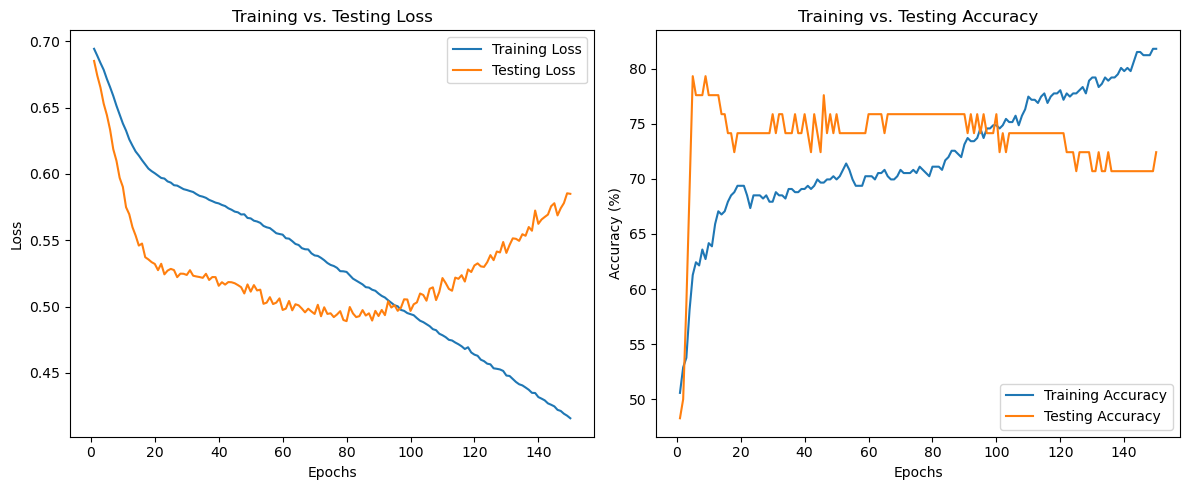

In [19]:
plot_training_results(results)

### 5. Random Search (find best hyperparameter)

In [20]:
import random, time

def random_search(model_class, num_trials, hyperparameter_space, train_dataset, test_dataset, num_epochs=50, verbose=False):
    best_accuracy = 0
    best_params = {}
    best_results = {}

    # Start timing the random search
    total_start_time = time.time()

    for trial in range(num_trials):
        # Randomly sample hyperparameters
        batch_size = random.choice(hyperparameter_space['batch_size'])
        learning_rate = random.choice(hyperparameter_space['learning_rate'])
        hidden_layers = random.choice(hyperparameter_space['hidden_layers'])

        # Print the hyperparameters for the current trial
        print(f"\nTrial {trial + 1}/{num_trials}:")
        print(f"Batch Size = {batch_size}, Learning Rate = {learning_rate}, Hidden Layers = {hidden_layers}")

        # Create new data loaders with the sampled batch size
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Initialize a new instance of the model with sampled hidden layers
        model_instance = model_class(input_size=train_dataset[0][0].shape[0], hidden_layers=hidden_layers)
        model_instance = model_instance.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

        # Timing the training for the current trial
        trial_start_time = time.time()

        # Training phase (criterion and optimizer are already defined in train_model)
        results = train_model(
            model=model_instance,
            train_loader=train_loader,
            test_loader=test_loader,
            learning_rate=learning_rate,
            num_epochs=num_epochs,
            verbose=verbose
        )

        # Calculate the time taken for this trial
        trial_end_time = time.time()
        trial_elapsed_time = trial_end_time - trial_start_time

        # Get the last test accuracy as the performance metric
        final_test_accuracy = results['test_accuracies'][-1]

        # Print the accuracy and time taken for the current trial
        print(f"Final Test Accuracy: {final_test_accuracy * 100:.2f}%")
        print(f"Time taken for this trial: {trial_elapsed_time:.2f} seconds")

        # Store the best model and parameters based on test accuracy
        if final_test_accuracy > best_accuracy:
            best_accuracy = final_test_accuracy
            best_params = {'batch_size': batch_size, 'learning_rate': learning_rate, 'hidden_layers': hidden_layers}
            best_results = results  # Store the best results

    # End timing
    total_end_time = time.time()
    total_elapsed_time = total_end_time - total_start_time

    # Print total search time
    print(f"\nRandom Search completed in {total_elapsed_time:.2f} seconds.")

    return best_accuracy, best_params, best_results

In [21]:
# Define the hyperparameter space with hidden layer configurations
hyperparameter_space = {
    'batch_size': [8, 16, 32],
    'learning_rate': [0.0005, 0.001, 0.005],
    'hidden_layers': [
        [5, 5],   # 2 hidden layers: first layer with 5 neurons, second with 5
        [10, 5],  # 2 hidden layers: first layer with 10 neurons, second with 5
        [5, 10],  # 2 hidden layers: first layer with 5 neurons, second with 10
        [10, 10] # 2 hidden layers: first layer with 10 neurons, second with 10
    ]
}

# set num of trials and num of epochs
num_trials = 20
num_epochs = 150

# Run the random search
best_accuracy, best_params, best_results = random_search(
    model_class=MLP_Network,
    num_trials=num_trials,
    hyperparameter_space=hyperparameter_space,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    num_epochs=num_epochs
)

# Output best hyperparameters and accuracy found
print("\nBest Trial Results:")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")
print("Best Hyperparameters:", best_params)


Trial 1/20:
Batch Size = 16, Learning Rate = 0.001, Hidden Layers = [5, 10]
Total Epochs: 150
Model Training Completed!
Final Test Accuracy: 70.69%
Time taken for this trial: 35.74 seconds

Trial 2/20:
Batch Size = 32, Learning Rate = 0.001, Hidden Layers = [10, 5]
Total Epochs: 150
Model Training Completed!
Final Test Accuracy: 68.97%
Time taken for this trial: 31.17 seconds

Trial 3/20:
Batch Size = 32, Learning Rate = 0.005, Hidden Layers = [5, 5]
Total Epochs: 150
Model Training Completed!
Final Test Accuracy: 70.69%
Time taken for this trial: 31.20 seconds

Trial 4/20:
Batch Size = 32, Learning Rate = 0.005, Hidden Layers = [10, 10]
Total Epochs: 150
Model Training Completed!
Final Test Accuracy: 62.07%
Time taken for this trial: 31.66 seconds

Trial 5/20:
Batch Size = 32, Learning Rate = 0.005, Hidden Layers = [10, 5]
Total Epochs: 150
Model Training Completed!
Final Test Accuracy: 58.62%
Time taken for this trial: 31.27 seconds

Trial 6/20:
Batch Size = 8, Learning Rate = 0.000

### 6. Final Configuration

In [22]:
num_epochs = 150
batch_size = best_params['batch_size']
learning_rate = best_params['learning_rate']
hidden_layers = best_params['hidden_layers']

In [23]:
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers = 0)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=True, num_workers = 0)
model = MLP_Network(16, hidden_layers = hidden_layers)

In [24]:
final_results = train_model(model, train_loader, test_loader, learning_rate=learning_rate, num_epochs=num_epochs, verbose=True)

Total Epochs: 150
Epoch [5/150], Train Loss: 0.6719, Train Acc: 54.91%, Test Loss: 0.6374, Test Acc: 58.62%
Epoch [10/150], Train Loss: 0.6372, Train Acc: 63.58%, Test Loss: 0.5762, Test Acc: 81.03%
Epoch [15/150], Train Loss: 0.6178, Train Acc: 66.18%, Test Loss: 0.5496, Test Acc: 79.31%
Epoch [20/150], Train Loss: 0.6076, Train Acc: 67.05%, Test Loss: 0.5293, Test Acc: 81.03%
Epoch [25/150], Train Loss: 0.6004, Train Acc: 67.05%, Test Loss: 0.5317, Test Acc: 75.86%
Epoch [30/150], Train Loss: 0.5955, Train Acc: 67.34%, Test Loss: 0.5213, Test Acc: 75.86%
Epoch [35/150], Train Loss: 0.5904, Train Acc: 67.34%, Test Loss: 0.5239, Test Acc: 75.86%
Epoch [40/150], Train Loss: 0.5866, Train Acc: 68.50%, Test Loss: 0.5243, Test Acc: 75.86%
Epoch [45/150], Train Loss: 0.5836, Train Acc: 69.65%, Test Loss: 0.5311, Test Acc: 75.86%
Epoch [50/150], Train Loss: 0.5815, Train Acc: 68.79%, Test Loss: 0.5295, Test Acc: 75.86%
Epoch [55/150], Train Loss: 0.5784, Train Acc: 69.36%, Test Loss: 0.5294,

##### This is the final result of fetus classification model by tuning __best hyperparameter__ with random search

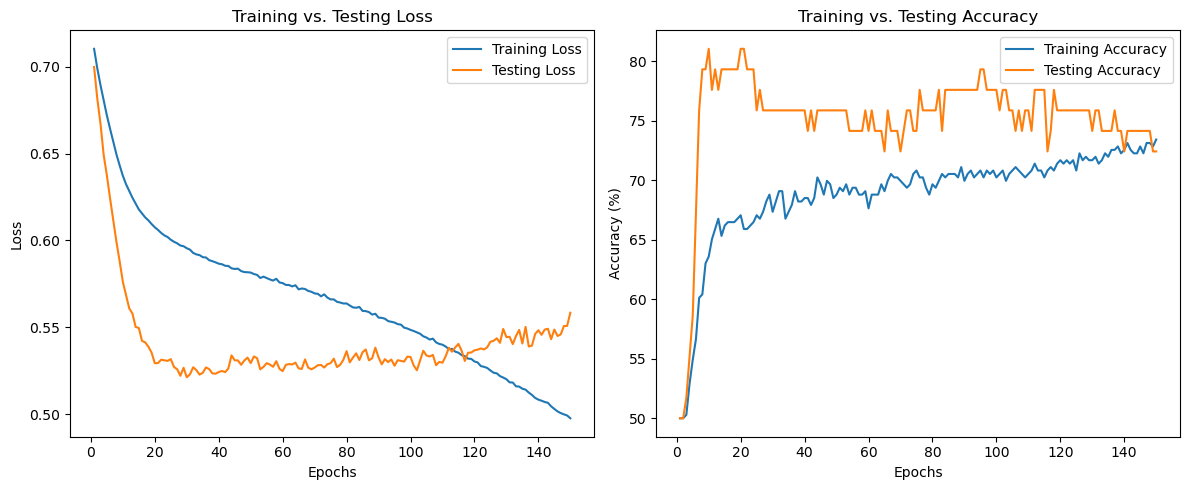

In [25]:
plot_training_results(final_results)